### 8. Pseudo random number generator I
The generation of equally distributed pseudo random numbers with a
so-called *Linear Congruential Generator* (LCG) proceeds according to
the rule
$$
X_{i+1} = (aX_i + c) \mod m,
$$
where for the following parts of this homework the (intentionally nonoptimal) parameters should be chosen as $a = 5$, $c = 0$, $m = 2^{11} = 2048$,
$X_0 = 1$.

**a)** Implement an LCG with these parameters and choose an appropriate normalisation such that $X_i \in [0, 1)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

```cpp
int prev_number = 1;
double LCG(int a = 5, int c = 0, int m = 2048){
    prev_number = ((a*prev_number+c) % m);
    return (double) prev_number / m;
}
```
Full code available at https://github.com/till-robert/cs1_seminar

In [2]:
!task8

/bin/bash: task8: command not found


**b)** Plot the time series $X_i$ of $10^4$
successive random numbers and
determine their period $\tau$ . Which meaning has this quantity?

```html
after a period of τ, the generated numbers repeat
```

In [3]:
#load random numbers
X = np.loadtxt("out/lcg.txt")[:10**4]

In [4]:
#find period
peaks = find_peaks(X,0.997)[0]
difference = np.diff(peaks)
period = np.average(difference)
print(f"τ = {period}")

τ = 512.0


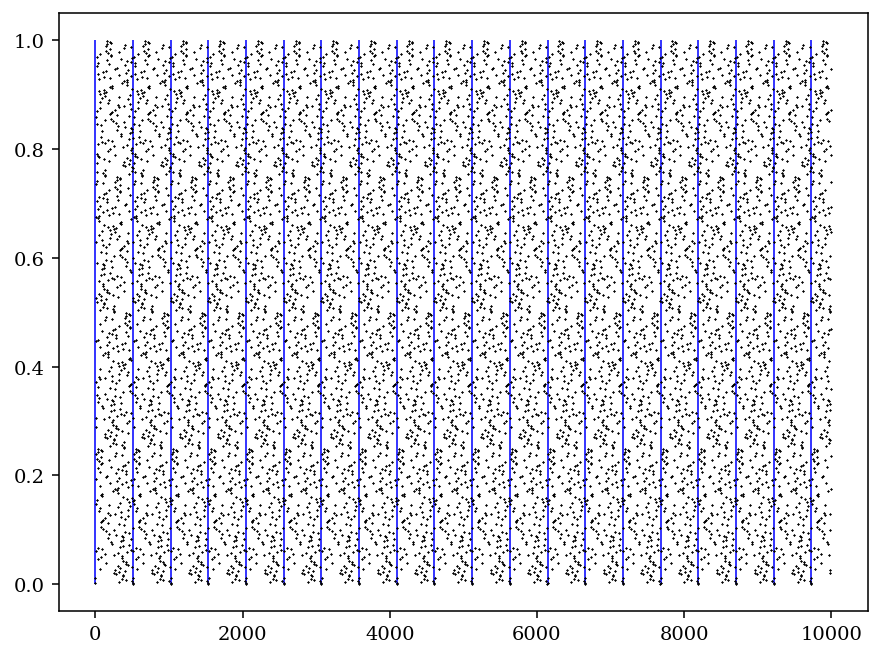

In [5]:
plt.plot(np.arange(0,10**4),X,"kx",ms=0.5)
plt.vlines(np.arange(20)*period,ymin=0,ymax=1, colors="b",lw=0.8)
#plt.ylim(0.997,1)
plt.show()

**c)** Compute the average $\overline{X} = \sum_{i=1}^N X_i \, / \, N$ and the estimator for the
variance $\hat{\sigma}_X^2 = \overline{X^2}−\overline{X}^2$
for $N = \tau , 10\tau$ and $100\tau$ random numbers.
Why do the results not improve inspite the higher statistics?

```html
the results don't improve because there isn't any new information gained for higher N
```

In [6]:
means = []
variances = []
for i in [1,10,100]:
    N = int(i * period)
    means.append(np.mean(X[:N]))
    variances.append(np.std(X[:N])**2)

In [7]:
print(f"N =\t\tτ\t\t10τ\t\t100τ\t\texpected")
print(f"mean\t\t"   + "\t".join(f"{mean:.8f}" for mean in means)   +"\t0.5")
print(f"variance\t" + "\t".join(f"{var:.8f}" for var in variances) + "\t0.08333333")

N =		τ		10τ		100τ		expected
mean		0.49951175	0.49951175	0.50010862	0.5
variance	0.08333302	0.08333302	0.08320181	0.08333333


**d)** Plot the so-called running average $\overline{X}(n) = \sum^n_{i=1} X_i\,/\,n$ as function
of $n$ in the interval $n \in [30\,000, 40\,000]$.

In [8]:
# load full data (10^5 random numbers)
X = np.loadtxt("out/lcg.txt")

In [9]:
n = np.arange(3*1e4,4*1e4,dtype=int)
running_avg = np.array([np.mean(X[:n_val]) for n_val in n])


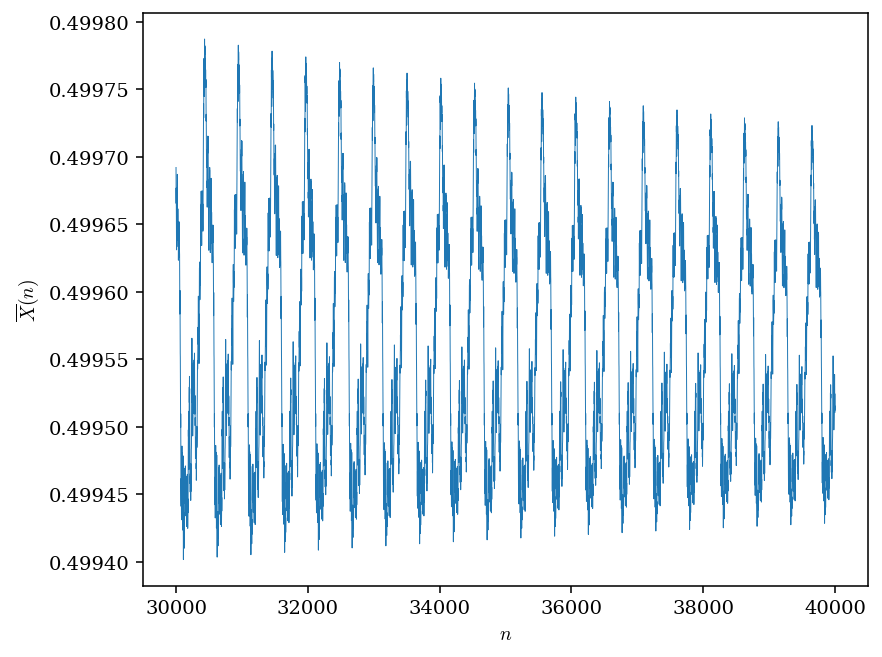

In [10]:
plt.plot(n,running_avg, lw=0.5)
plt.ylabel(r"$\overline{X}(n)$")
plt.xlabel(r"$n$")

plt.show()

**e)** Plot an $xy$ graph with $x = X_i$ and $y = X_{i+1}$ for $i = 1, 3, 5, ...$

In [11]:
x = X[:10**4:2]
y = X[1:10**4+1:2]


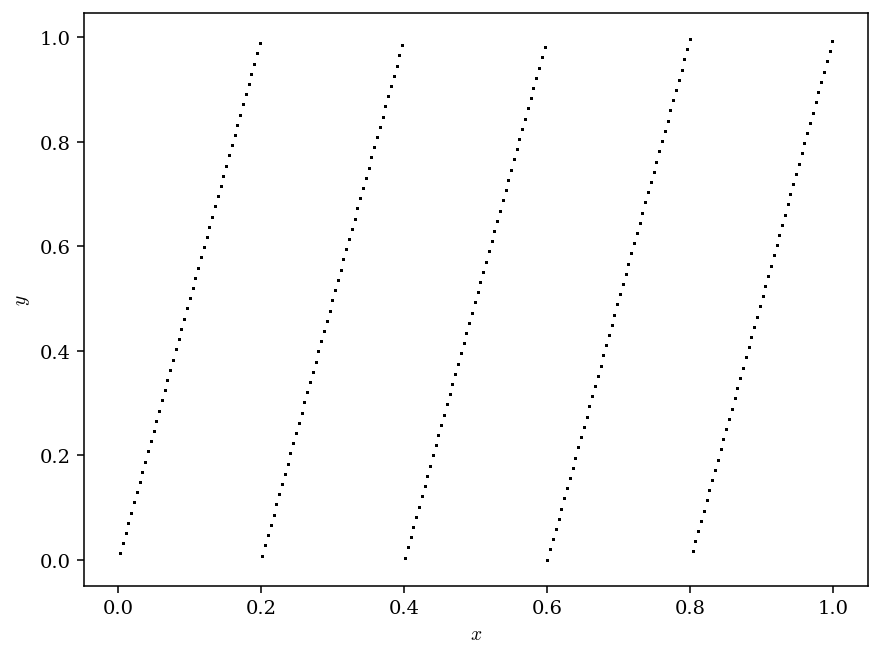

In [12]:
plt.plot(x,y,"k.",ms=0.5)
plt.ylabel(r"$y$")
plt.xlabel(r"$x$")

plt.show()